In [307]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [308]:
vacc=pd.read_csv("C:\\Users\\tushk\\Downloads\\vaccinations.csv", sep = ',')
tweets=pd.read_csv("C:\\Users\\tushk\\Downloads\\vaccination_all_tweets.csv", sep = ',')

In [309]:
vacc.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [310]:
vacc.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

In [311]:
vacc=vacc.groupby('date')['daily_vaccinations'].sum().reset_index()

In [312]:
vacc.set_index('date',inplace=True)

In [313]:
vacc.index = pd.to_datetime(vacc.index)

In [314]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


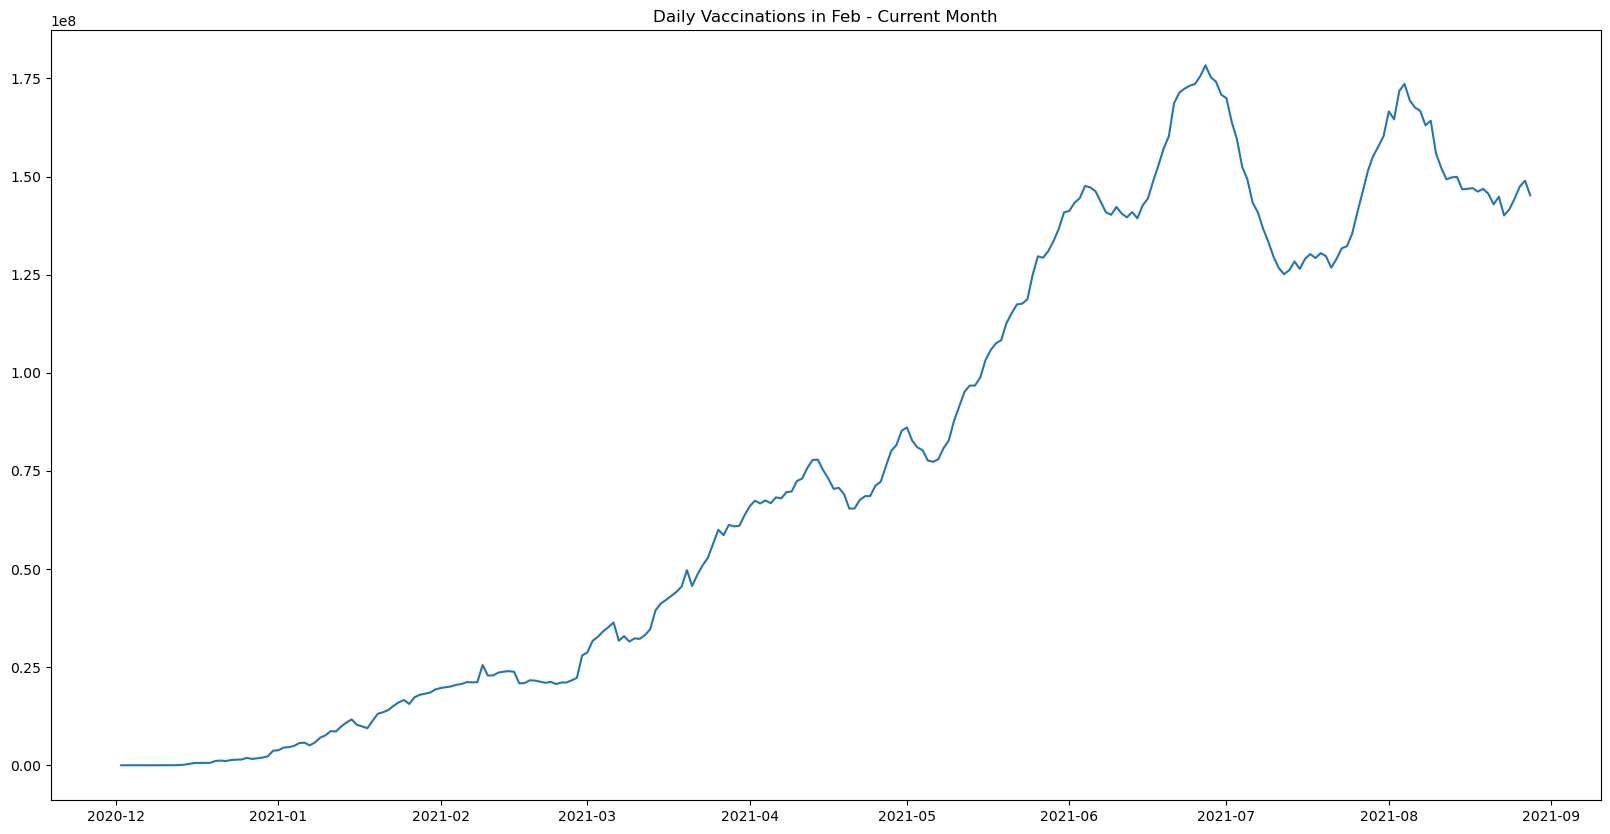

In [315]:
plt.figure(figsize=(20, 10))
plt.plot(vacc['daily_vaccinations'])
plt.title('Daily Vaccinations in Feb - Current Month')
plt.show()

In [316]:
tweets['datedt'] = pd.to_datetime(tweets['date'])
tweets['date_only'] = tweets['datedt'].dt.date

In [317]:
tweets_agg_df = tweets.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [318]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

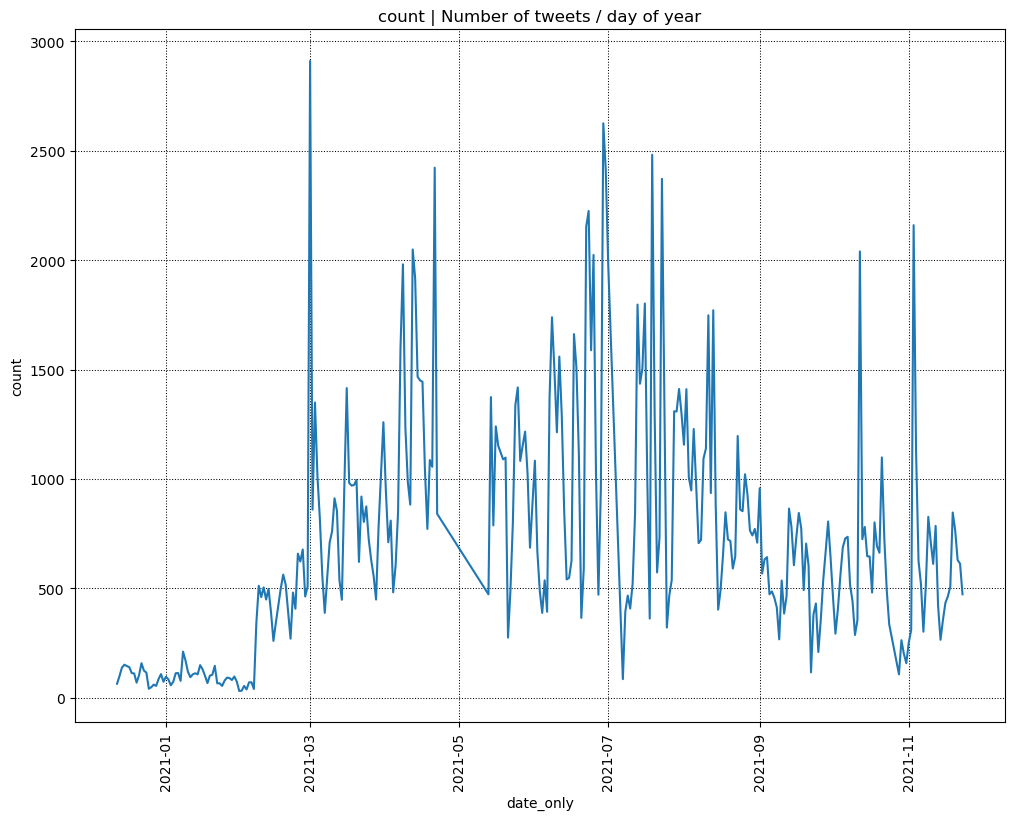

In [319]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

In [320]:
tweets_agg_df['date_only'] = pd.to_datetime(tweets_agg_df['date_only'])

In [321]:
tweets_agg_df=tweets_agg_df[(tweets_agg_df['date_only'] >= '2021-01-01') & (tweets_agg_df['date_only'] <= '2021-07-01')]

In [322]:
tweets_agg_df = tweets_agg_df.set_index(['date_only'])

In [323]:
tweets_agg_df

,count
date_only,
2021-01-01,95
2021-01-02,83
2021-01-03,56
2021-01-04,72
2021-01-05,111
...,...
2021-06-27,470
2021-06-28,957
2021-06-29,2626


In [324]:
tweets_agg_df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', name='date_only', length=162, freq=None)

In [325]:
vacc.index

DatetimeIndex(['2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11',
               ...
               '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28'],
              dtype='datetime64[ns]', name='date', length=270, freq=None)

In [326]:
vacc

,daily_vaccinations
date,
2020-12-02,0.0
2020-12-03,0.0
2020-12-04,0.0
2020-12-05,0.0
2020-12-06,0.0
...,...
2021-08-24,141618411.0
2021-08-25,144342936.0
2021-08-26,147456968.0


In [327]:
vacc['daily_vaccinations'][tweets_agg_df.index]

date_only
2021-01-01      3818590.0
2021-01-02      4504894.0
2021-01-03      4613597.0
2021-01-04      4934845.0
2021-01-05      5653379.0
                 ...     
2021-06-27    178349163.0
2021-06-28    175331704.0
2021-06-29    174173353.0
2021-06-30    170874596.0
2021-07-01    169947643.0
Name: daily_vaccinations, Length: 162, dtype: float64

H0: Количество твитов не влияет на количество вакцинированных

In [328]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vacc['daily_vaccinations'][tweets_agg_df.index]]).transpose(), maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3620  , p=0.0015  , df_denom=152, df_num=3
ssr based chi2 test:   chi2=16.8267 , p=0.0008  , df=3
likelihood ratio test: chi2=15.9945 , p=0.0011  , df=3
parameter F test:         F=5.3620  , p=0.0015  , df_denom=152, df_num=3


{3: ({'ssr_ftest': (5.361967522719106, 0.0015478932595361275, 152.0, 3),
   'ssr_chi2test': (16.82670071274351, 0.0007671725346067421, 3),
   'lrtest': (15.994549776987697, 0.0011369056381917726, 3),
   'params_ftest': (5.3619675228420265, 0.0015478932592922234, 152.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

р < 0.05, следовательно нулевая гипотеза отвергается и твиты влияют на количество вакцинированных

In [329]:
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vacc['daily_vaccinations'][tweets_agg_df.index]]).transpose(), maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.0072  , p=0.0810  , df_denom=146, df_num=5
ssr based chi2 test:   chi2=10.7924 , p=0.0557  , df=5
likelihood ratio test: chi2=10.4376 , p=0.0637  , df=5
parameter F test:         F=2.0072  , p=0.0810  , df_denom=146, df_num=5


{5: ({'ssr_ftest': (2.0072411390419003, 0.08095082113586431, 146.0, 5),
   'ssr_chi2test': (10.792358179095148, 0.05565593062189395, 5),
   'lrtest': (10.437587085240011, 0.06374439307778597, 5),
   'params_ftest': (2.0072411391530323, 0.08095082111993804, 146.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [258]:
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vaccs['daily_vaccinations'][tweets_agg_df.index]]).transpose(), maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.2888  , p=0.2432  , df_denom=131, df_num=10
ssr based chi2 test:   chi2=14.9540 , p=0.1337  , df=10
likelihood ratio test: chi2=14.2634 , p=0.1613  , df=10
parameter F test:         F=1.2888  , p=0.2432  , df_denom=131, df_num=10


C:\Users\tushk\AppData\Local\Temp\ipykernel_20220\192227166.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vaccs['daily_vaccinations'][tweets_agg_df.index]]).transpose(), maxlag=[10])


{10: ({'ssr_ftest': (1.288799798589947, 0.2431647005667237, 131.0, 10),
   'ssr_chi2test': (14.954012930203968, 0.13374747890256367, 10),
   'lrtest': (14.26335805994313, 0.16131439310813198, 10),
   'params_ftest': (1.2887997986050947, 0.24316470055826006, 131.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          

р > 0.05, следовательно нулевая гипотеза принимается и твиты не влияют на количество вакцинированных

А теперь наоборот
H0: Количествоо вакцинированных влияет на количество твитов

In [330]:
grangercausalitytests(pd.DataFrame([vacc['daily_vaccinations'][tweets_agg_df.index], tweets_agg_df['count']]).transpose(), maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2078  , p=0.0005  , df_denom=152, df_num=3
ssr based chi2 test:   chi2=19.4812 , p=0.0002  , df=3
likelihood ratio test: chi2=18.3770 , p=0.0004  , df=3
parameter F test:         F=6.2078  , p=0.0005  , df_denom=152, df_num=3


{3: ({'ssr_ftest': (6.2078356229898235, 0.0005255231542179943, 152.0, 3),
   'ssr_chi2test': (19.48116836951412, 0.000217395827494485, 3),
   'lrtest': (18.37704416246561, 0.00036770836106598864, 3),
   'params_ftest': (6.207835622989819, 0.0005255231542179943, 152.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

р < 0.05, следовательно нулевая гипотеза отвергается и вакцинированные влияют на количество твитов

In [331]:
grangercausalitytests(pd.DataFrame([vacc['daily_vaccinations'][tweets_agg_df.index], tweets_agg_df['count']]).transpose(), maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.8646  , p=0.0026  , df_denom=146, df_num=5
ssr based chi2 test:   chi2=20.7789 , p=0.0009  , df=5
likelihood ratio test: chi2=19.5143 , p=0.0015  , df=5
parameter F test:         F=3.8646  , p=0.0026  , df_denom=146, df_num=5


{5: ({'ssr_ftest': (3.864619160176987, 0.002559091191352142, 146.0, 5),
   'ssr_chi2test': (20.77894548451325, 0.0008917643335383861, 5),
   'lrtest': (19.514329737929074, 0.001540972785558278, 5),
   'params_ftest': (3.864619160176884, 0.0025590911913526563, 146.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

р < 0.05, следовательно нулевая гипотеза отвергается и вакцинированные влияют на количество твитов

In [173]:
grangercausalitytests(pd.DataFrame([vaccs['daily_vaccinations'][tweets_agg_df.index], tweets_agg_df['count']]).transpose(), maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.4900  , p=0.0004  , df_denom=131, df_num=10
ssr based chi2 test:   chi2=40.4949 , p=0.0000  , df=10
likelihood ratio test: chi2=35.9007 , p=0.0001  , df=10
parameter F test:         F=3.4900  , p=0.0004  , df_denom=131, df_num=10


C:\Users\tushk\AppData\Local\Temp\ipykernel_20220\1809442175.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  grangercausalitytests(pd.DataFrame([vaccs['daily_vaccinations'][tweets_agg_df.index], tweets_agg_df['count']]).transpose(), maxlag=[10])


{10: ({'ssr_ftest': (3.49001681834038, 0.0004225362248929384, 131.0, 10),
   'ssr_chi2test': (40.49485163265174, 1.3860499890845597e-05, 10),
   'lrtest': (35.90071093928691, 8.754787503340689e-05, 10),
   'params_ftest': (3.4900168183409455, 0.0004225362248921927, 131.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

р < 0.05, следовательно нулевая гипотеза отвергается и вакцинированные влияют на количество твитов

Приходим к выводу, что количество вакцинированных влияет на количество твитов